In [1]:
# Imports 
import numpy as np
import pandas as pd
import random
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
import operator
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
from matplotlib import animation
import time
from humanfriendly import format_timespan
%matplotlib inline 
plt.rcParams["figure.figsize"] = (15,12)
plt.figure(figsize=(6, 3))

<Figure size 432x216 with 0 Axes>

<Figure size 432x216 with 0 Axes>

In [2]:
df = pd.read_csv('ma.csv')


In [3]:
df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Casablanca,33.5992,-7.6200,Morocco,MA,Casablanca-Settat,admin,4370000.0,4370000.0
1,El Kelaa des Srarhna,32.0500,-7.4000,Morocco,MA,Marrakech-Safi,NaN,1450021.0,1450021.0
2,Fès,34.0433,-5.0033,Morocco,MA,Fès-Meknès,admin,1112072.0,1112072.0
3,Tangier,35.7767,-5.8039,Morocco,MA,Tanger-Tétouan-Al Hoceïma,admin,947952.0,947952.0
4,Marrakech,31.6295,-7.9811,Morocco,MA,Marrakech-Safi,admin,928850.0,928850.0


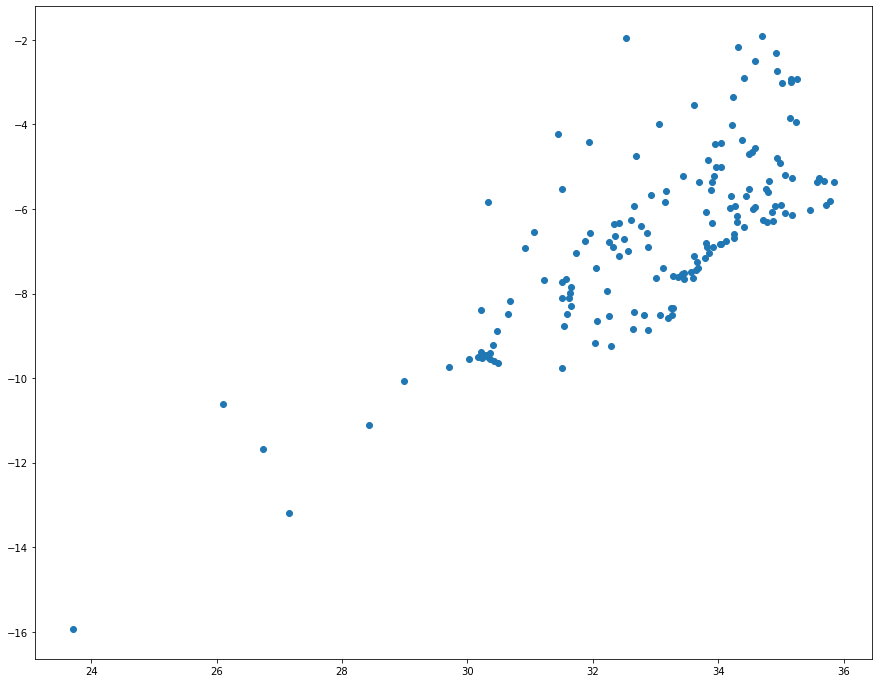

In [4]:
X = df['lat']
y = df['lng']
plt.scatter(X,y)
plt.show()

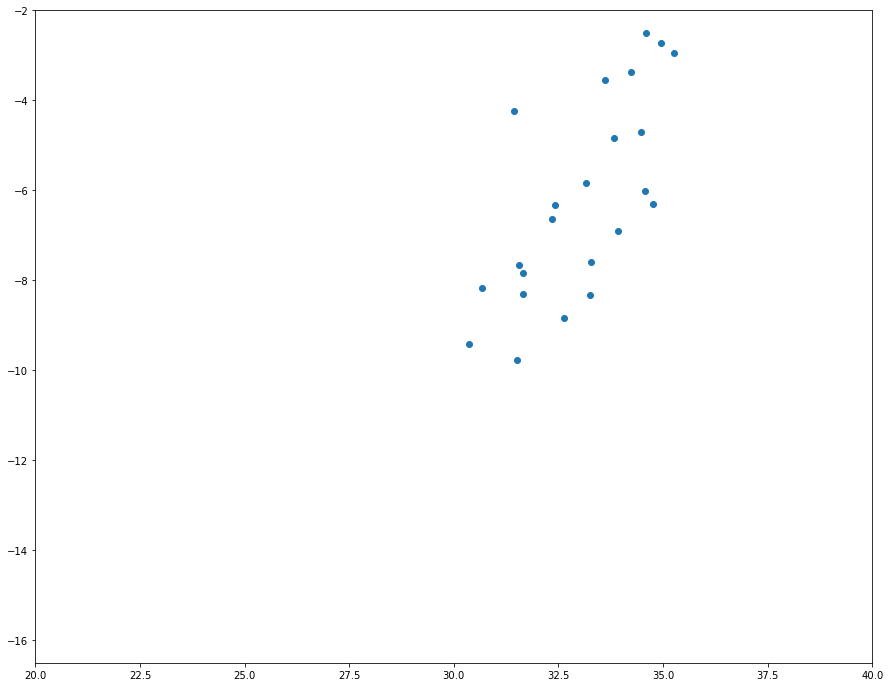

In [5]:
#7 15 31 38HARD 39
# pick a sample of 23 city
df_tmp = df.sample(n=23, random_state=7)
X = df_tmp['lat']
y = df_tmp['lng']
names = df_tmp['city']
plt.scatter(X,y)
plt.xlim(20,40)
plt.ylim(-16.5, -2)
# for k in range(23):
#     plt.annotate(names.iloc[k], (X.iloc[k], y.iloc[k]), fontsize=13)

plt.show()

In [6]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"
    
    def to_tuple(self):
        return (self.x, self.y)

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

def createRoute(cityList):
    route = random.sample(cityList, len(cityList), )
    return route

def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

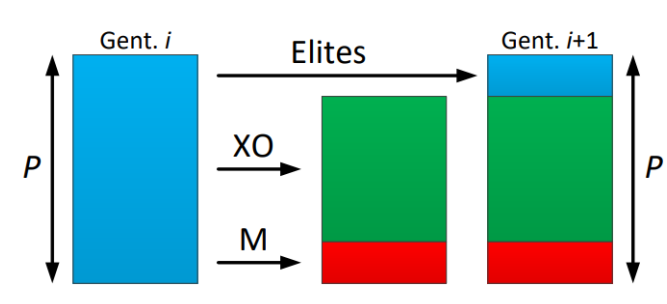

In [7]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

the TSP is unique in that we need to include all locations exactly one time. 
To abide by this rule, we can use a special breeding function called ordered crossover. 
In ordered crossover, we randomly select a subset of the first parent string 
and then fill the remainder of the route with the genes from the second parent in the order 
in which they appear, without duplicating any genes in the selected subset from the first parent 

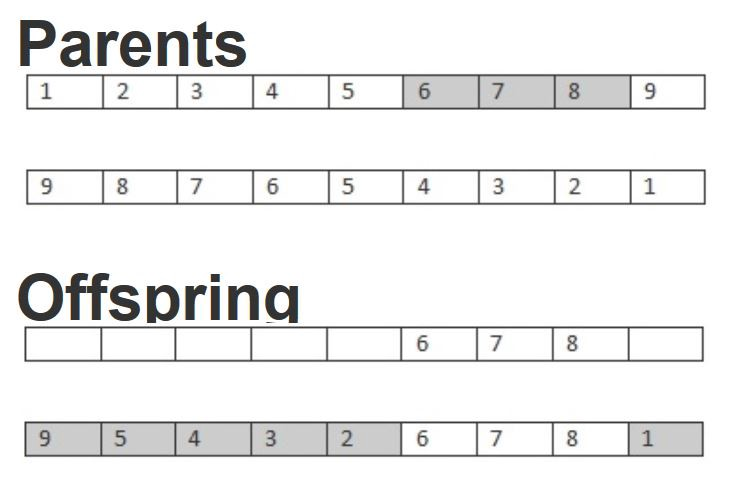

In [8]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children


In [11]:
cityList

[(34.9396,-2.7334),
 (34.5853,-2.5056),
 (34.23,-3.36),
 (33.6167,-3.55),
 (35.2569,-2.9342),
 (34.7703,-6.3047),
 (30.3633,-9.4144),
 (31.5644,-7.6628),
 (33.83,-4.83),
 (33.15,-5.8333),
 (33.27,-7.5872),
 (31.513,-9.7687),
 (33.25,-8.3347),
 (34.4833,-4.7),
 (34.5581,-6.0078),
 (32.4167,-6.3333),
 (33.9234,-6.9076),
 (31.4361,-4.2328),
 (32.35,-6.6333),
 (31.6503,-7.8361),
 (30.6748,-8.1742),
 (32.632,-8.8456),
 (31.6507,-8.3021)]

In [9]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations, cityNames, random_state):
    random.seed(random_state)
    plt.rcParams["figure.figsize"] = (25,20)
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))

    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])

    fig, ax = plt.subplots(1,2)
    start_time = time.time()
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        distance = 1 / rankRoutes(pop)[0][1]
        progress.append(distance)

        if(i%1==0):
            if(i%100==100): print("generation:{}, distance={}".format(i, distance))
            routeIndex = rankRoutes(pop)[0][0]
            route = pop[routeIndex]
            res = route
            res = list(map(lambda x:x.to_tuple(), res))
            res.append(res[0])
            path = Path(res)

            patch = patches.PathPatch(path, facecolor="white")
            ax[0].cla()
            ax[0].add_patch(patch)
            ax[0].set_xlim(27,36)
            
            ax[0].set_ylim(-11, -1)
            elapsed_time = time.time() - start_time
            elapsed_time =  format_timespan(elapsed_time)
            ax[0].set_title('Generation={} - Elapsed time = {}'.format(i, elapsed_time), fontsize=20)
            ax[0].scatter([x[0] for x in res], [x[1] for x in res], color="red", marker="s", s=100)

            if(i > generations-100):
                for k in range(len(population)):
                    ax[0].annotate(cityNames[k], ([x.to_tuple()[0] for x in cityList][k], [x.to_tuple()[1] for x in cityList][k]), fontsize=13)

            ax[1].plot(progress)
            ax[1].set_title('Convergence plot', fontsize=20)
            ax[1].set_ylabel('Distance', fontsize=20)
            ax[1].set_xlabel('Generation', fontsize=20)
#             plt.pause(.1)
            
            iteration = str(i)
            if(len(iteration)==1):
                iteration = "00"+iteration
            elif(len(iteration)==2):
                iteration = "0"+iteration
                
            plt.savefig(f'animation/{iteration}.png')
        
    plt.show()
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [13]:
cityList

[(34.9396,-2.7334),
 (34.5853,-2.5056),
 (34.23,-3.36),
 (33.6167,-3.55),
 (35.2569,-2.9342),
 (34.7703,-6.3047),
 (30.3633,-9.4144),
 (31.5644,-7.6628),
 (33.83,-4.83),
 (33.15,-5.8333),
 (33.27,-7.5872),
 (31.513,-9.7687),
 (33.25,-8.3347),
 (34.4833,-4.7),
 (34.5581,-6.0078),
 (32.4167,-6.3333),
 (33.9234,-6.9076),
 (31.4361,-4.2328),
 (32.35,-6.6333),
 (31.6503,-7.8361),
 (30.6748,-8.1742),
 (32.632,-8.8456),
 (31.6507,-8.3021)]

In [12]:
pop = initialPopulation(20, cityList)
pop

[[(32.632,-8.8456),
  (30.6748,-8.1742),
  (34.4833,-4.7),
  (31.513,-9.7687),
  (31.4361,-4.2328),
  (33.27,-7.5872),
  (32.35,-6.6333),
  (33.83,-4.83),
  (34.9396,-2.7334),
  (32.4167,-6.3333),
  (31.5644,-7.6628),
  (34.23,-3.36),
  (30.3633,-9.4144),
  (31.6507,-8.3021),
  (35.2569,-2.9342),
  (33.6167,-3.55),
  (31.6503,-7.8361),
  (33.9234,-6.9076),
  (34.7703,-6.3047),
  (34.5853,-2.5056),
  (33.25,-8.3347),
  (33.15,-5.8333),
  (34.5581,-6.0078)],
 [(30.3633,-9.4144),
  (35.2569,-2.9342),
  (30.6748,-8.1742),
  (33.6167,-3.55),
  (33.15,-5.8333),
  (31.6507,-8.3021),
  (34.7703,-6.3047),
  (31.5644,-7.6628),
  (34.5581,-6.0078),
  (33.83,-4.83),
  (33.27,-7.5872),
  (32.632,-8.8456),
  (31.4361,-4.2328),
  (31.6503,-7.8361),
  (34.4833,-4.7),
  (34.9396,-2.7334),
  (31.513,-9.7687),
  (33.9234,-6.9076),
  (34.5853,-2.5056),
  (32.35,-6.6333),
  (33.25,-8.3347),
  (32.4167,-6.3333),
  (34.23,-3.36)],
 [(31.6507,-8.3021),
  (34.7703,-6.3047),
  (33.6167,-3.55),
  (33.15,-5.8333)

In [10]:
cityList = []
cityNames = []
for key, city in df_tmp.to_dict()['city'].items():
    cityList.append(City(x=df_tmp.to_dict()['lat'][key], y=df_tmp.to_dict()['lng'][key]))
    cityNames.append(df_tmp.to_dict()['city'][key])

In [12]:
%matplotlib qt
res = geneticAlgorithm(population=cityList, popSize=80, eliteSize=20, mutationRate=0.01, generations=500, cityNames=cityNames, random_state=1)

Initial distance: 57.00788523282476
Final distance: 22.93552540352463


## Convert the figures to a video

In [13]:
import cv2
import os

image_folder = 'animation'
video_name = 'animation_final.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()

video.release()

In [16]:
pop = initialPopulation(100, cityList)
popRanked = rankRoutes(pop)

In [25]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [14]:
cityList

[(34.9396,-2.7334),
 (34.5853,-2.5056),
 (34.23,-3.36),
 (33.6167,-3.55),
 (35.2569,-2.9342),
 (34.7703,-6.3047),
 (30.3633,-9.4144),
 (31.5644,-7.6628),
 (33.83,-4.83),
 (33.15,-5.8333),
 (33.27,-7.5872),
 (31.513,-9.7687),
 (33.25,-8.3347),
 (34.4833,-4.7),
 (34.5581,-6.0078),
 (32.4167,-6.3333),
 (33.9234,-6.9076),
 (31.4361,-4.2328),
 (32.35,-6.6333),
 (31.6503,-7.8361),
 (30.6748,-8.1742),
 (32.632,-8.8456),
 (31.6507,-8.3021)]

In [15]:
sample_ind = [[1,2,3],[2,3]]